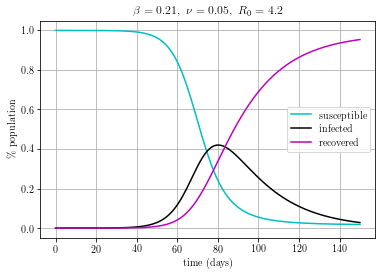

In [94]:
# Analysis & visualization of the basic SIR model
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pylab
# This allows using \TeX in matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Set parameters
beta = 0.21
nu = 0.05
N = 1.0

# basic reproduction number
R0 = beta / nu

# Define model
def SIR(Y,t):
    S,I,R = Y
    dSdt =  -beta*S*I
    dIdt =  beta*S*I - nu*I
    dRdt =  nu*I
    return [dSdt,dIdt,dRdt]

# Show a timeline plot of the infection
tspan = np.linspace(0, 150, 150)
i0 = 0.00001
s0 = 1.0 - i0
r0 = 0


sol = ys = odeint(SIR, [s0,i0,r0], tspan, mxstep=50000)
plt.plot(tspan, sol[:, 0], 'c', label='susceptible')
plt.plot(tspan, sol[:, 1], 'k', label='infected')
plt.plot(tspan, sol[:, 2], 'm', label='recovered')
plt.grid()
pylab.legend(loc='center right')
plt.title(r"$\beta="+str(beta)+r",\ \nu="+str(nu)+",\ R_0="+str(R0)+"$")
plt.xlabel('time (days)')
plt.ylabel('\% population')
plt.show()

Final state of epidemic with starting values s0=0.99999, i0=1e-05: 
s=0.0160404895464, i=-1.53270201903e-16, r=0.983959510454
The number of infecteds in the population will start decreasing after 81 days.


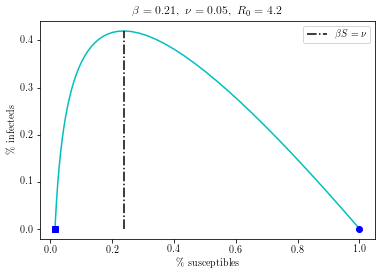

In [95]:
# Draw a phase plot in the S-I plane
# 

tspan = np.linspace(0, 10000, 10000)
Y0 = [s0,i0, r0]
ys = odeint(SIR, Y0, tspan, mxstep = 500)
plt.plot(ys[:,0], ys[:,1], 'c-') # path
plt.plot([ys[0,0]], [ys[0,1]], 'bo') # start
plt.plot([ys[-1,0]], [ys[-1,1]], 'bs') # end
plt.title(r"$\beta="+str(beta)+r",\ \nu="+str(nu)+",\ R_0="+str(R0)+"$")
plt.xlabel('\% susceptibles')
plt.ylabel('\% infecteds')
print("Final state of epidemic with starting values s0="+str(s0)+", i0="+str(i0)+": \n" +
      "s="+ str(ys[-1,0])+", i="+ str(ys[-1,1])+ ", r="+str(ys[-1,2]))

# Determine the point where the curve changes direction
# (num. infecteds starts decreasing so epidemic dies out)
#
# This can be deduced analytically from the equation for dI/dt:
# dI/dt = (beta*S -nu) * I
# as the point where beta*S = nu
plt.plot([nu/beta,nu/beta],[0,np.max(ys[:,1])],'k-.',label=r"$\beta S = \nu$")
pylab.legend(loc='upper right')

# Therefore
print("The number of infecteds in the population will start decreasing after "
       +str(np.argmax(ys[:,0] < nu / beta))+" days.")

plt.show()